In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load data as dataframe
df = pd.read_csv('../datasets/iris.csv')

In [3]:
# show the first n rows
df.head(n=10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,5.4,3.7,1.5,0.2,Iris-setosa
9,4.8,3.4,1.6,0.2,Iris-setosa


In [4]:
# statistics
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# data shape
print('Shape: ', df.shape)

Shape:  (150, 5)


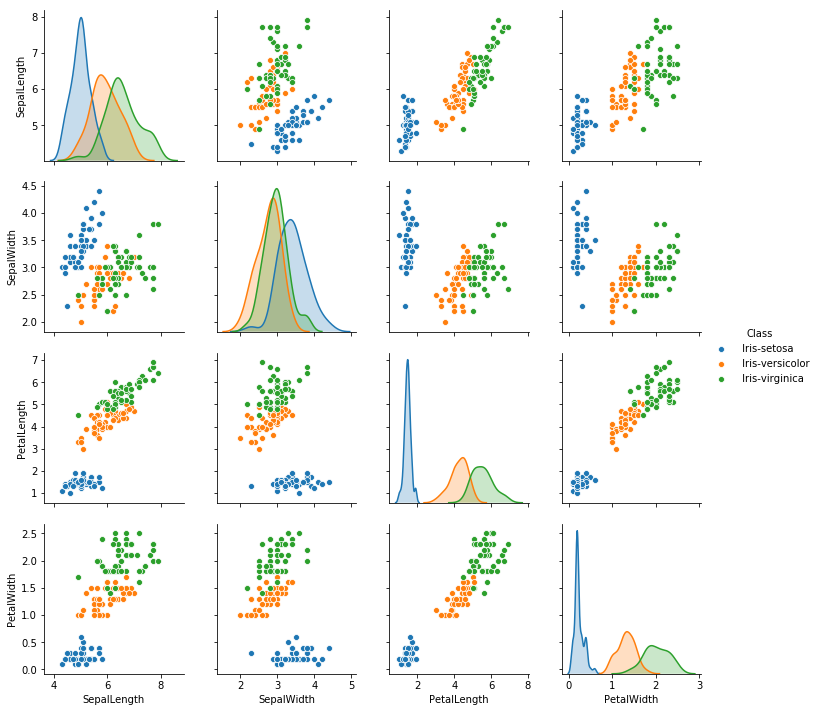

In [6]:
# JupyterLab で実行する際は、この行を書くことで描画できるようになります。
%matplotlib inline

sns.pairplot(df, hue='Class')

In [7]:
X=df.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=df.loc[:,'Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, train_size = 0.6, 
                                                    shuffle = True)

In [30]:
clf = SVC(C=100.0,gamma='auto', kernel='linear')
clf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# predict label
y_pred = clf.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 19]])

In [8]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(svc, classes=df)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

NameError: name 'df' is not defined

In [33]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.9666666666666667


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# 交差検証
scores = cross_val_score(clf, X, y,cv=5)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [1.         0.96666667 0.9        0.96666667 1.        ]
Average score: 0.9666666666666668


In [14]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

     Iris-setosa       1.00      1.00      1.00        20
 Iris-versicolor       1.00      0.95      0.97        20
  Iris-virginica       0.95      1.00      0.98        20

       micro avg       0.98      0.98      0.98        60
       macro avg       0.98      0.98      0.98        60
    weighted avg       0.98      0.98      0.98        60



In [15]:
# analyze results
print('y = {} * x + {}'.format(clf.coef_, clf.intercept_))

y = [[-0.11908548  0.55607373 -0.8247269  -0.52843486]
 [ 0.03929273  0.25540274 -0.51080549 -0.25540274]
 [ 0.54000979  0.71999878 -1.85999633 -1.98000122]] * x + [1.27275123 0.90176818 7.01192159]


In [16]:
odds = np.exp(clf.coef_).flatten()
odds_df = pd.DataFrame([df.columns, odds], index=['features', 'odds']).T

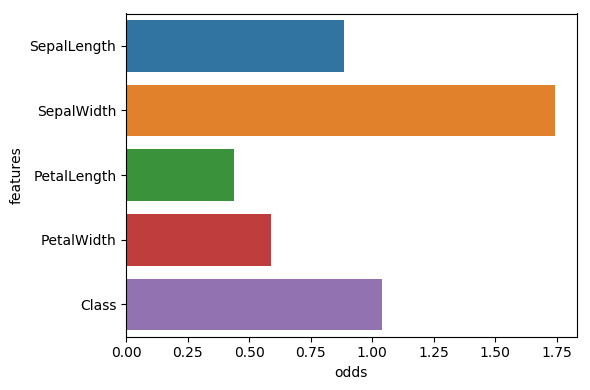

In [17]:
plt.figure(dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()

In [18]:
coef_df = pd.DataFrame([df.columns,
                        clf.coef_.flatten()], index=['features', 'coef']).T

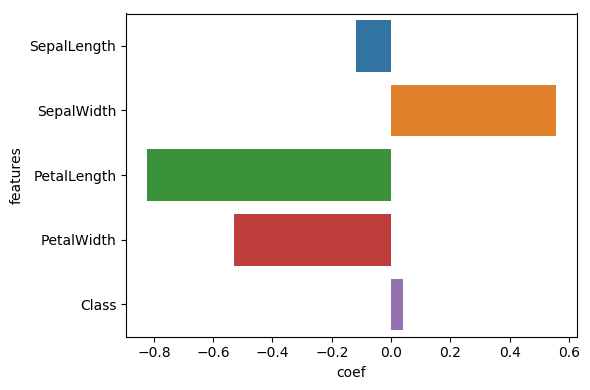

In [19]:
plt.figure(dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()